*CONTROLE DE ACESSO*

>`Controle de acesso diz respeito às tecnologias (hardware e software) que têm como principal função o gerenciamento do acesso a determinados ambientes, especialmente em locais onde exista um fluxo elevado de pessoas, materiais e veículos. É o caso, por exemplo, de empresas, condomínios, academias, instituições de ensino ou qualquer outro local em que o acesso seja restrito.Nesse sentido, o principal objetivo dos sistemas de controle de acesso é impedir a entrada de pessoas não autorizadas, aumentando a segurança e garantindo a integridade de pessoas e bens. Não à toa, o uso de sistema de controle de acesso tem se tornado cada vez mais comum. E isso se explica, em parte, por sua capacidade de aliar alta eficiência, modernidade e simplicidade em uma única solução integrada de segurança.`

<center><img src = 'CA.jpg' ></center>

>* *Cartão de acesso ou tag*
>>`Muito utilizado em ambientes corporativos, tanto para funcionários quanto para visitantes. Funciona como uma espécie de credencial do usuário, permitindo ao sistema identificá-lo e liberá-lo de acordo com as restrições estabelecidas pela própria empresa. A liberação é feita por meio da aproximação ou introdução do cartão ou da tag a um leitor.Trata-se de um recurso especialmente útil para empresas que precisam restringir ou liberar o acesso de determinados colaboradores a determinadas áreas ou departamentos da empresa, limitando e organizando a circulação de pessoas e possíveis brechas na segurança do local.`

>* *Vantagens do controle de acesso*
>>* `Acompanhar o fluxo de pessoas`
>>* `Reduzir os custos operacionais`
>>* `Aumentar a segurança`
>>* `Possibilidade de localização dos colaboradores dentro da empresa;`
>>* **`Possibilidade de integração ao sistema de ponto eletrônicos dos funcionários`**


>* *Objetivo*
>>`O objetivo desse projeto é analisar os dados de controle de acesso a fim de melhorar a aplicação do controle de acesso do prédio, identificar problemas e extrair informações importantes desses dados.`

>>**`Espera-se um modelo que seja capaz de identificar problemas como: Cartões invalidos, cartões com id incorreto, horario de entrada e saida de funcionarios, horas e dias trabalhados, quantidade de carros na garagem`**

*Autor: `Cássio Araujo`*

**Importar os Dados**

`Os dados que serão utilizados nessa analise foram extraimos do SQL Server do servidor de automação. Estes dados estão em aquivo .csv e serão importados para uma estrutura DataFrame utilizando a biblioteca pandas a fim de possibilitar sua manipulação e análise`

In [289]:
# Importando as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import timedelta
# definir o estilo do seaborn para os plots
sns.set_style('whitegrid')

In [290]:
# Importando o arquivo .csv para um dataframe
df = pd.read_csv('C:/Users/engca/Documents/Estudos (Python)/env/Controle de Acesso/Controle de Acesso Premium.csv', sep=';', parse_dates=True, index_col='ACEInstance')



**Análise Exploratória de Dados**

`A primeira coisa que faremos apos importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas, Isso possibilitara criar uma consciencia situacional inicial a respeito do formato de entrada e da estrutura geral dos dados`

In [291]:
# Identificar o volume de dados do DataFrame
print('\nDIMENSÕES DO DATAFRAME:\n')
print('Variáveis:\t{}'.format(df.shape[1]))
print('Entradas:\t{}'.format(df.shape[0]))


DIMENSÕES DO DATAFRAME:

Variáveis:	13
Entradas:	896909


`Já as primeiras 5 entradas desse conjunto de dados permitem adquirirmos uma noção inicial sobre o tipo de formato, exemplos de entrada e formulação das hipoteses iniciais do processo investigativo`

In [292]:
# Visualização do dataframe
df.tail()

,EventTime,EventTypeNumber,EventObjectID,EventObjectName,EventObjectDevice,EventObjectType,EventObjectInstance,CardUserInstance,CardUserName,CardUserNumber,SiteCode,EventArg,FloorName
ACEInstance,,,,,,,,,,,,,
899464,2023-05-02 13:21:41.000,1,20000.DC201,DC_Entrada Catraca 02 Terreo,20000,DC,201,2322,GIOVANNA AZEVEDO,40165,226,0,NaN
899465,2023-05-02 13:22:06.000,1,20000.DC301,DC_Entrada Catraca 01 Terreo,20000,DC,301,2292,ROBSON LENIN EVANGELISTA CARVALHO,1314,240,0,NaN
899466,2023-05-02 13:22:14.000,1,30000.DC102,DC_Saida Catraca 01 Terreo,30000,DC,102,2196,RENATO BATISTA DE LIMA,620,240,1,NaN
899467,2023-05-02 13:22:18.000,1,20000.DC202,DC_Saida Catraca 02 Terreo,20000,DC,202,330,RAUL RIBEIRO DE SOUZA,1245,240,1,NaN
899468,2023-05-02 13:22:37.000,1,20000.DC301,DC_Entrada Catraca 01 Terreo,20000,DC,301,1765,CARTÃO MESTRE 03,1479,250,0,NaN


In [293]:
#Identificando as colunas do dataframe
df.columns

Index(['EventTime', 'EventTypeNumber', 'EventObjectID', 'EventObjectName',
       'EventObjectDevice', 'EventObjectType', 'EventObjectInstance',
       'CardUserInstance', 'CardUserName', 'CardUserNumber', 'SiteCode',
       'EventArg', 'FloorName'],
      dtype='object')

`Algumas conclusões iniciais que podem ser destacadas a respeito dessa analise inicial`

**Dicionário das variáveis**
>* `ACEInstance` - Número de Registro dos Eventos do Controle de Acesso
>* `EventTime` - Data e Hora do Evento
>* `EventTypeNumber` - Número do Tipo do Evento
>* `EventObjectID` - Código da torre e porta de acesso
>* `EventObjectName` - Nome da Leitora do Evento
>* `EventObjectDevice` - Endereço da Gerenciadora de Acesso (Torres)
>* `EventObjectType` - Tipo de Objeto da Gerenciadora de Acesso
>* `EventObjectInstance` - Instancia do Tipo de Objeto da Gerenciadora
>* `CardUserInstance` - Objeto CardUser do Usuario
>* `CardUserName` - Nome do Usuario
>* `CardUserNumber` - Número do Cartão do Usuário (Idenfificação exclusiva)
>* `SiteCode` - Codigo do Cartão do Usuário  
>* `EventArg` - Não identificado
>* `FloorName` - Não identificado

`Vamos realizar o levantamento dos tipos de variaveis que compoem o DataFrame a fim de estabelecer a divisão entre as variaveis numericas e as variaveis categoricas`

In [294]:
# Verificar os tipos das variaveis do DataFrame
print('\nTIPOS DE VARIÁVEIS DO DATAFRAME:\n')
display(df.dtypes)


TIPOS DE VARIÁVEIS DO DATAFRAME:



EventTime               object
EventTypeNumber          int64
EventObjectID           object
EventObjectName         object
EventObjectDevice        int64
EventObjectType         object
EventObjectInstance      int64
CardUserInstance         int64
CardUserName            object
CardUserNumber           int64
SiteCode                 int64
EventArg                 int64
FloorName              float64
dtype: object

`Outra análise importante para se fazer é identificar a quantidade de dados ausentes por Variavel`

In [295]:
# Ordenar em ordem decrescente as variavieis por seus valores ausentes
print('\nVALORES AUSENTES:\n')
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)*100


VALORES AUSENTES:



FloorName              100.000000
CardUserName             1.069116
EventTime                0.000000
EventTypeNumber          0.000000
EventObjectID            0.000000
EventObjectName          0.000000
EventObjectDevice        0.000000
EventObjectType          0.000000
EventObjectInstance      0.000000
CardUserInstance         0.000000
CardUserNumber           0.000000
SiteCode                 0.000000
EventArg                 0.000000
dtype: float64

`Em realção à porcentagem de valores ausentes identificados neste dataset:`

>* `A variavel` ['FloorName'] `possui ` 100% ` dos seus valores ausentes`
>* `A variavel` ['CardUserName'] `possui ` 1.2% ` dos seus valores ausentes, ou seja, esse registro não tem idenfificação nominal`

`Neste projeto, as variaveis de maior importancia não possuem ausencia de dados, possibilitando uma analise mais precisa`

`Outra análise interessante de se fazer diz respeito à contagem de valores únicos por Coluna.`

In [296]:
# Valores únicos
print('\nVALORES ÚNICOS:\n')
print(df.nunique().sort_values())


VALORES ÚNICOS:

FloorName                   0
EventObjectType             3
EventObjectDevice           5
EventArg                   11
EventTypeNumber            14
EventObjectInstance        24
EventObjectName            34
EventObjectID              78
SiteCode                  192
CardUserInstance         2306
CardUserNumber           2429
CardUserName             2629
EventTime              874257
dtype: int64


`A contagem de valores unicos nos mostram que a variavel` ['FloorName'] `não apresenta nenhum valor unico. Como não há maiores informaçoes sobre essa variavel iremos destacar essa variavel na analise`

**Preparação dos Dados**

`Com as informações que obtivemos anteriormente da etapa anterior, vamos prosseguir com a limpeza e preparação dos dados`

In [297]:
# Remover colunas indesejadas para um novo DataFrame
df_clean = df.copy()
df_clean.drop(['EventArg','FloorName','EventTypeNumber','EventObjectID','CardUserInstance'], axis=1 , inplace=True) #Inplace serve para aplicar a função na variavel original sem criar uma copia

In [298]:
#Renomeando a colunas
df_clean.rename(columns={'EventTime': 'Data/Hora'},inplace=True)
df_clean.rename(columns={'EventObjectName': 'Entrada/Saida'},inplace=True)
df_clean.rename(columns={'EventObjectDevice': 'Torre'},inplace=True)
df_clean.rename(columns={'EventObjectType': 'Tipo_Objeto'},inplace=True)
df_clean.rename(columns={'EventObjectInstance': 'Catraca'},inplace=True)
df_clean.rename(columns={'CardUserName': 'Nome_Usuario'},inplace=True)
df_clean.rename(columns={'CardUserNumber': 'Numero_Cartao'},inplace=True)


In [299]:
# Alterando o tipo de dado da coluna EventTime
df_clean['Data/Hora'] = pd.to_datetime(df_clean["Data/Hora"])

In [300]:
# Extrai a data e a hora em colunas separadas
df_clean['Data'] = df_clean['Data/Hora'].dt.date
df_clean['Hora'] = df_clean['Data/Hora'].dt.time


In [301]:
# converter a coluna para o tipo datetime
df_clean['Hora'] = pd.to_datetime(df_clean['Hora'], format='%H:%M:%S')
# extrair apenas a hora de cada valor
df_clean['Hora'] = df_clean['Hora'].dt.hour

In [302]:
# Incluindo coluna data do EventTime apenas com mês e ano
df_clean['Ano_Mes'] = df_clean['Data/Hora'].dt.strftime('%Y-%m')

In [303]:
# Incluindo coluna data do EventTime apenas com mês e ano
df_clean['Ano'] = df_clean["Data/Hora"].apply(lambda x: "{}".format(x.year))

#Separando Data por Mes
df_clean['Mes'] = df_clean["Data/Hora"].apply(lambda x: "{:02d}".format(x.month))

In [304]:
# Removendo linhas do Tipo de Objeto da Gerenciadora de Acesso diferentes de DC (Door Controller)
df_clean.drop(df_clean[df_clean.Tipo_Objeto != 'DC'].index, axis=0, inplace=True)

In [305]:
# Extrair os dias da semana da coluna "Data"
df_clean['Data'] = pd.to_datetime(df_clean['Data'])
df_clean['dia_da_semana'] = df_clean['Data'].dt.strftime('%A')

* `Foi feita uma copia do DataFrame original para que as alteraçoes sejam feitas apenas na copia.` 
* `As colunas` ['EventArg'] `e` ['FloorName'] `foram descartadas por não terem informaçoes relevantes para a analise.`
* `Foi criada uma nova variavel chamada` ['EventDate'] `para representar somente a data do evento.`
* `As colunas` ['EventTime'] `e` ['EventDate'] `foram alteradas para o tipo datetime64, pois são tipo de data/hora.`
* `Nosso objetivo é a analisar somente o tipo de objeto` 'DC' `, pois isso foi descartada as entradas diferentes desse tipo de objeto especificado`


**Dicionário das variáveis [`EventObjectDevice`]**

>* `20000` - Gerenciadora de Acesso Torre E

>>**Dicionário das variáveis [`EventObjectInstance`]**

>>>* `801` - DC_Entrada CPD                                
>>>* `901` - DC_Entrada Cancela                              
>>>* `301` - DC_Entrada Catraca 01 Terreo                    
>>>* `201` - DC_Entrada Catraca 02 Terreo                    
>>>* `501` - DC_Entrada Catraca 03 Terreo                    
>>>* `601` - DC_Entrada Catraca G1                           
>>>* `701` - DC_Entrada Catraca G2                           
>>>* `902` - DC_Saida Cancela                                
>>>* `302` - DC_Saida Catraca 01 Terreo                      
>>>* `202` - DC_Saida Catraca 02 Terreo                      
>>>* `502` - DC_Saida Catraca 03 Terreo                      
>>>* `602` - DC_Saida Catraca G1                             
>>>* `702` - DC_Saida Catraca G2                             
>>>* `101` - DC_Urna Catraca 01 Terreo                       
>>>* `102` - DC_Urna Catraca 02 Terreo                       
>>>* `401` - DC_Urna Catraca 03 Terreo      

**Dicionário das variáveis [`EventObjectDevice`]**

>* `30000` - Gerenciadora de Acesso Torre F

>>**Dicionário das variáveis [`EventObjectInstance`]**

>>>* `101` - DC_Entrada Catraca 01 Terreo
>>>* `201` - DC_Entrada Catraca 02 Terreo
>>>* `301` - DC_Entrada Catraca 03 Terreo
>>>* `601` - DC_Entrada Catraca G1       
>>>* `702` - DC_Entrada Catraca G2       
>>>* `102` - DC_Saida Catraca 01 Terreo  
>>>* `202` - DC_Saida Catraca 02 Terreo  
>>>* `302` - DC_Saida Catraca 03 Terreo  
>>>* `602` - DC_Saida Catraca G1         
>>>* `701` - DC_Saida Catraca G2         
>>>* `401` - DC_Urna Catraca 01 Terreo   
>>>* `402` - DC_Urna Catraca 02 Terreo   
>>>* `501` - DC_Urna Catraca 03 Terreo  

In [306]:
# Alterando Valores da Coluna Torre
df_clean['Torre'] = df_clean['Torre'].replace({30000: 'Torre F', 20000: 'Torre E'})

In [307]:
#Excluindo valores NaN da Coluna Nome_Usuario
df_clean.dropna(subset=['Nome_Usuario'],inplace=True)

In [308]:
#Filtrando a coluna Torre por Torre E e F
df_clean = df_clean[df_clean["Torre"].isin(["Torre E", "Torre F"])]

In [309]:
# Extrair as palavras "Entrada", "Saida" e "Urna" da coluna "Texto"
df_clean['Acesso'] = df_clean['Entrada/Saida'].apply(lambda x: 'Entrada' if 'Entrada' in x else ('Saida' if 'Saida' in x else 'Urna'))

# Apagar a coluna "Entrada/Saida"
df_clean.drop('Entrada/Saida', axis=1, inplace=True)

`Para uma analise mais eficiente e para cumprir com o objetivo desse projeto foi filtrado a variavel` ['EventTime'] `em um periodo de data especifico`

In [310]:
# Filtro por data do evento
mes_def = df_clean[(df_clean['Ano'] == '2022')|(df_clean['Ano'] == '2023')]

In [311]:
# Filtro por catracas do Térreo, G1 E G2
total_pessoas = mes_def[mes_def["Catraca"].isin([801,901,902])==False]

In [312]:
#agrupando por Data e Nome, quantidade de pessoas por dia 
total_pessoas = mes_def.groupby(['Data', 'Nome_Usuario']).first().reset_index()


In [313]:
total_pessoas["Acesso"].value_counts()

Entrada    92936
Saida      13116
Urna          34
Name: Acesso, dtype: int64

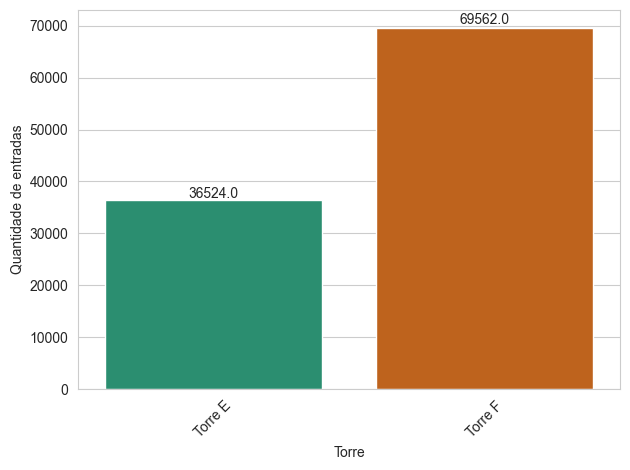

In [314]:
fig, ax = plt.subplots()

sns.countplot(x = total_pessoas.Torre, ax=ax, palette = "Dark2")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, height*1.01), ha='center')

labels = ax.get_xticklabels() 
for label in labels:
    label.set_rotation(45)
ax.set_ylabel("Quantidade de entradas")

"""ax.set_title('Ocupação/Mes')"""

plt.tight_layout()

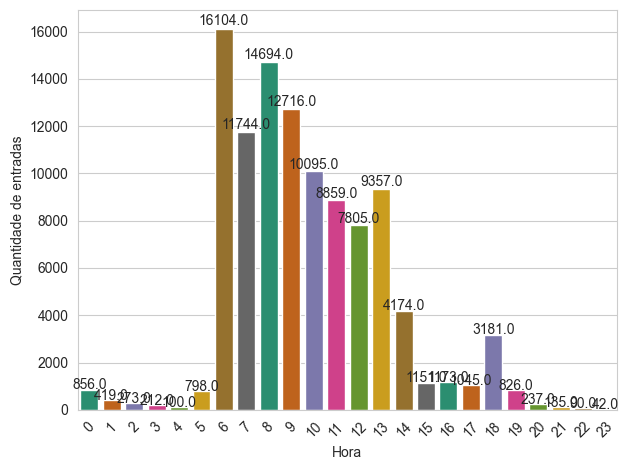

In [315]:
fig, ax = plt.subplots()

sns.countplot(x = total_pessoas.Hora, ax=ax, palette = "Dark2")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, height*1.01), ha='center')

labels = ax.get_xticklabels() 
for label in labels:
    label.set_rotation(45)

ax.set_ylabel("Quantidade de entradas")

"""ax.set_title('Ocupação/Hora')"""

plt.tight_layout()

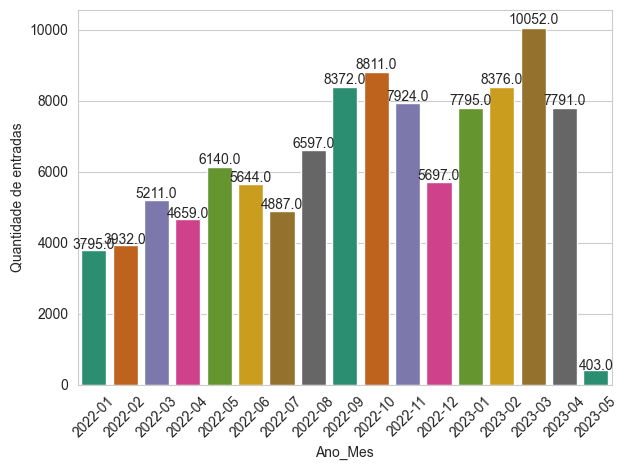

In [316]:
fig, ax = plt.subplots()

sns.countplot(x = total_pessoas.Ano_Mes, ax=ax, palette = "Dark2")

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, height*1.01), ha='center')

labels = ax.get_xticklabels() 
for label in labels:
    label.set_rotation(45)

ax.set_ylabel("Quantidade de entradas")

"""ax.set_title('Ocupação/Mes')"""

plt.tight_layout()

In [317]:
# Agrupar por data e contar o número de usuários
round(total_pessoas.groupby(['Data'])[['Nome_Usuario']].count().loc[lambda x: x['Nome_Usuario'] > 50].mean())

Nome_Usuario    314.0
dtype: float64